In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
df = pd.read_csv(url, names=columns)

# Separar as variáveis preditoras e a variável alvo
X = df.drop('Species', axis=1)
y = df['Species']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #random_state=1 fixa a semente do gerador aleatório

In [ ]:
# Criar o classificador de árvore de decisão
decision_T = DecisionTreeClassifier()

# Treinar o modelo
decision_T = decision_T.fit(X_train, y_train)

In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

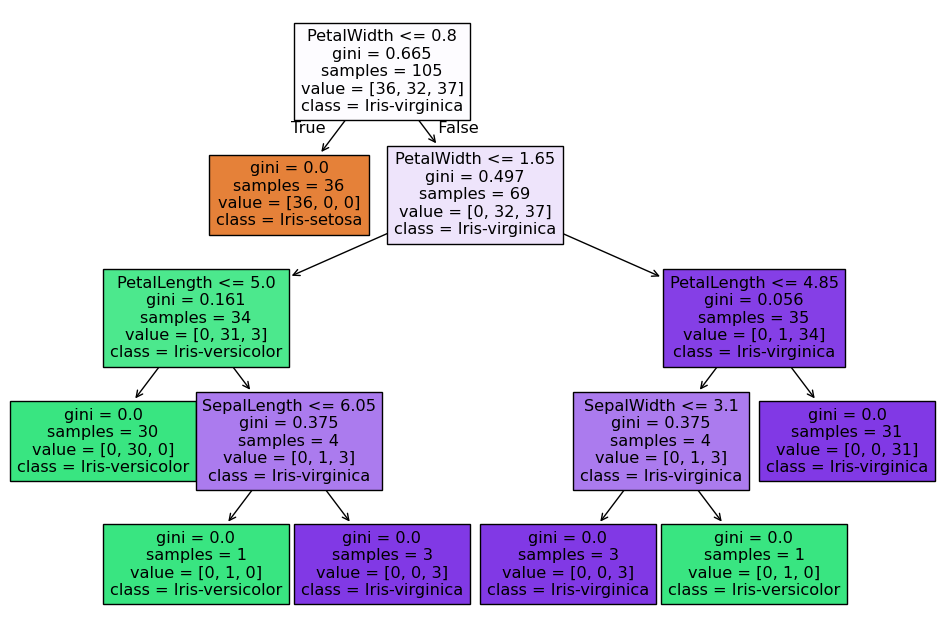

In [4]:
#columns[:-1] seleciona todas as colunas exceto a última ('Survived')
plt.figure(figsize=(12,8))
plot_tree(decision_T, filled=True, feature_names=columns[:-1], class_names=df['Species'].unique())
plt.show()

#width - largura
#lenght - comprimento
#filled=True  -> Preenche os nós da árvore com cores.
#feature_names=columns[:-1]->Define os nomes das features que aparecem nos nós da árvore.
#class_names=df['Species']->Lista com os nomes das classes da variável alvo (target).

In [5]:
# Prever a resposta para os dados de teste
y_pred = decision_T.predict(X_test)

# Calcular a acurácia
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))


Acurácia: 0.9555555555555556


In [6]:
#O cálculo da importância de cada característica (ou variável) em modelos de árvore de decisão é feito com base em quanto essa característica
#contribui para a redução da impureza ao longo das divisões nas árvores.

importances = decision_T.feature_importances_
for i, feature in enumerate(columns[:-1]):
    print(f"{feature}: {importances[i]}")

SepalLength: 0.02146946564885496
SepalWidth: 0.02146946564885496
PetalLength: 0.0631695426262108
PetalWidth: 0.8938915260760792


Característica que mais contribuiu para a redução da impureza ao longo da árvore foi o PetalWidth.

**Interpretação e Insights:**

**Importância das Características:**

Na árvore gerada, você pode observar quais características (features) foram utilizadas para tomar decisões em cada nó. As características que aparecem nos níveis superiores da árvore são geralmente mais importantes para a classificação.

*Insight*: No dataset Iris, é comum que a característica petal width (largura da pétala) ou petal length (comprimento da pétala) seja usada em níveis superiores da árvore, indicando que essas características são muito discriminativas para diferenciar as espécies de íris.

**Divisões (Splits):**

Cada divisão na árvore corresponde a um limiar de uma característica que separa os dados em grupos diferentes. Por exemplo, se a largura da pétala for menor que um determinado valor, a árvore pode classificar a amostra como uma certa espécie.

**Insight:** Se a largura da pétala for menor que 0.8 cm, a amostra é muito provável que seja da espécie Iris-setosa. Isso mostra como a árvore de decisão aprende regras simples e interpretáveis para classificar os dados.

**Profundidade da Árvore:**

A profundidade da árvore indica quantas divisões (ou perguntas) são necessárias para chegar a uma decisão final (classe).

**Insight** Se a árvore tem uma profundidade baixa (poucos níveis), isso pode indicar que o modelo é simples e que os dados são facilmente separáveis. No entanto, uma árvore muito profunda pode estar superajustando (overfitting) aos dados.

**Classes Finais:**

As folhas da árvore (nós finais) mostram a classe atribuída após todas as divisões.

**Insight:** As folhas onde a maioria das amostras pertence a uma única classe indicam uma alta confiança do modelo nessa classificação. Se houver misturas de classes em uma folha, isso pode indicar que a característica utilizada não é totalmente discriminativa.

**Uso da Árvore para Tomada de Decisão:**

A árvore de decisão pode ser utilizada para entender como diferentes características contribuem para a classificação. Pode-se usar isso para priorizar certas características em novos modelos ou estudos.

**Insight:** Por exemplo, ao saber que a largura da pétala é uma característica altamente discriminativa, pode-se focar em coletar dados de alta qualidade para essa característica em futuras coletas de dados.